In [15]:
### Your analysis in this mini project will focus on cleaning, exploring, and visualizing a sales dataset to extract meaningful insights using python and data visualization libraries."


In [17]:
### Importing libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
##### importing Data set 


In [23]:
DFT = pd.read_csv('my data/Dataset.csv')

In [25]:
DFT

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19
...,...,...,...,...,...,...,...
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72


In [29]:
DFT.describe()

,OrderID,Quantity,Price,Total
count,200.000000,200.00000,200.000000,194.000000
mean,100.500000,1.36500,676.000000,937.638711
std,57.879185,0.61943,300.291316,654.166632
min,1.000000,1.00000,100.000000,93.310000
25%,50.750000,1.00000,400.000000,562.907500
50%,100.500000,1.00000,600.000000,823.940000
75%,150.250000,2.00000,1000.000000,1065.937500
max,200.000000,3.00000,1000.000000,3293.240000


                                     Questions 

How much sales did we make based on the product? 
which month has the highest sales?

In [27]:
DFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [31]:
DFT.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [35]:
DFT.columns

Index(['OrderID', 'Date', 'CustomerID', 'Product', 'Quantity', 'Price',
       'Total'],
      dtype='object')

In [45]:
print('Total sales record:', DFT.shape[0])

print('Total unique customers:', DFT['CustomerID'].nunique())

print('Date range:', DFT['Date'].min(), 'to', DFT['Date'].max())

Total sales record: 200
Total unique customers: 20
Date range: 2024-01-02 to 2024-12-29


In [51]:
####check for unique products

DFT['Product'].unique()

array(['Phone', 'Laptop', 'Monitor', nan, 'Tablet', 'Headphones'],
      dtype=object)

In [55]:
### total numbers of sales each product

DFT['Product'].value_counts()

Product
Laptop        76
Phone         59
Tablet        31
Monitor       15
Headphones     9
Name: count, dtype: int64

In [57]:
DFT.isna().sum().sort_values(ascending = False)  #checking for null values

Product       10
Total          6
OrderID        0
Date           0
CustomerID     0
Quantity       0
Price          0
dtype: int64

In [61]:
DFT['Total'] = DFT['Total'].fillna(DFT['Quantity']*DFT['Price'])

In [63]:
DFT['Total'].isna().sum()

0

Convert the Data to pandas Datetime format

In [66]:
DFT['Date'] = pd.to_datetime(DFT['Date'])

                                             Data Visuliaztion 

In [69]:
###let get total  amount of sales per product

Sales_Prod = DFT.groupby('Product')['Total'].sum().reset_index()

In [71]:
Sales_Prod

,Product,Total
0,Headphones,1229.54
1,Laptop,106405.98
2,Monitor,4415.36
3,Phone,46171.36
4,Tablet,17119.23


In [75]:
### let get the amount of sales per month

DFT['Month'] = DFT['Date'].dt.month
sales_Month = DFT.groupby('Month')['Total'].sum().reset_index()

In [77]:
sales_Month

,Month,Total
0,1,8755.09
1,2,15593.58
2,3,13793.66
3,4,15942.33
4,5,15425.28
5,6,15249.31
6,7,14710.40
7,8,18018.66
8,9,14576.32
9,10,15905.58


Plotting time 

Product vs Total; to visualize total amount sold per product

Month vs Total   to visualize total amount sold per month

Quantity Vs Total to visualize total amount sold per quantity 

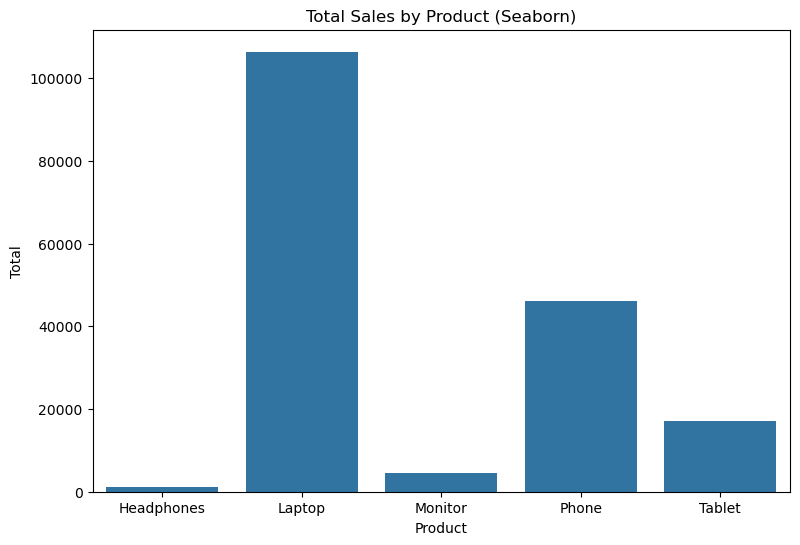

In [87]:
# Product vs Total, using a bar chart.

plt.figure(figsize=(9,6))
sns.barplot(data=Sales_Prod, x='Product', y='Total')
plt.title('Total Sales by Product (Seaborn)')
plt.xlabel('Product')
plt.ylabel('Total')
plt.show()

From the chart above, we can deduce that laptops had the highest sales from February to December 2024, followed by phones, tablets, and monitors. Headphones had the lowest sales during this period. 

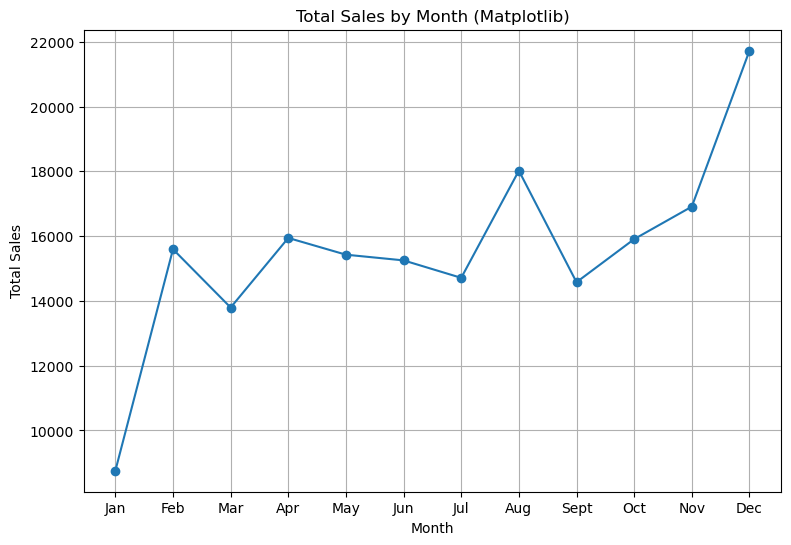

In [110]:
# For Month vs Total, lines plot

plt.figure(figsize=(9,6))
plt.plot(sales_Month['Month'], sales_Month['Total'],marker='o')
plt.title('Total Sales by Month (Matplotlib)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=np.arange(1,13), labels=['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.grid(True)
plt.show()



As you can see sales moves up gradually from Jan to feb and then remain waving between Mar to Jul. Aug it climb up again but went slight from Sept to Nov. But Dec sales was the hightest for the year

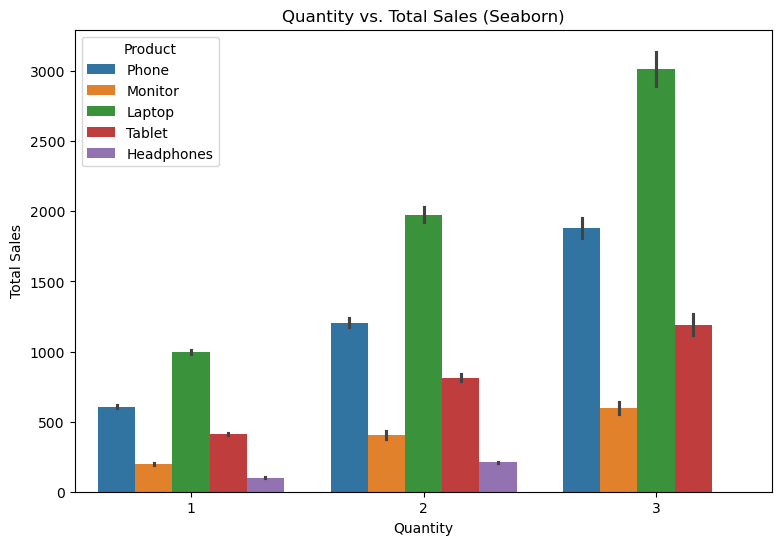

In [115]:
# The Next is Quantity vs Total, we have the bar chart below. 
plt.figure(figsize=(9,6))
sns.barplot(data=DFT, x='Quantity', y='Total', hue ='Product')
plt.title('Quantity vs. Total Sales (Seaborn)')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

we can all see that for every 4 months laptop sold best.... followed by phone and then talet.. Monitor follow suit but headphones was just at the bottom. 